# Data Visualization Assignment (Matplotlib & Seaborn)
Author: Katie Sylvia

Data set in the data folder as `auto_mpg_dataset.csv`. Dataset is of cars from the 1970s and 1980s.<br>
Data from: https://www.mldata.io/datasets-sort/regression/<br>

In [69]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [21]:
# Read in the data
cars_df = pd.read_csv('data/auto_mpg_dataset.csv')

In [22]:
# Display the first 5 rows
cars_df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [23]:
# Summary statistics (using .describe())
cars_df.describe().round(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,5.45,193.43,-1404.64,2970.42,15.57,76.01,1.57,23.51
std,1.70,104.27,12213.42,846.84,2.76,3.70,0.80,7.82
min,3.00,68.00,-100000.00,1613.00,8.00,70.00,1.00,9.00
25%,4.00,104.25,75.00,2223.75,13.82,73.00,1.00,17.50
50%,4.00,148.50,92.00,2803.50,15.50,76.00,1.00,23.00
75%,8.00,262.00,125.00,3608.00,17.18,79.00,2.00,29.00
max,8.00,455.00,230.00,5140.00,24.80,82.00,3.00,46.60


In [6]:
# OK, I gotta see what car has 3 cylinders
cars_df[cars_df['cylinders']== 3]

'''
    Mazda had rotary engines thus no "cylinders"
    Pretty sure that the engines had two triangular rotors that spun and not three
    I think that they were counting the fact that the rotors were triangular
    The cars were wicked fast but poor on fuel economy.
'''

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
71,3,70.0,97.0,2330.0,13.5,72,3,mazda rx2 coupe,19.0
111,3,70.0,90.0,2124.0,13.5,73,3,maxda rx3,18.0
243,3,80.0,110.0,2720.0,13.5,77,3,mazda rx-4,21.5
334,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs,23.7


In [60]:
# just seeing the other odd cylinder cars
# volvo made 5 cylinder cars too
cars_df[cars_df['cylinders']== 5]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
274,5,131.0,103.0,2830.0,15.9,78,2,audi 5000,20.3
297,5,183.0,77.0,3530.0,20.1,79,2,mercedes benz 300d,25.4
327,5,121.0,67.0,2950.0,19.9,80,2,audi 5000s (diesel),36.4


In [24]:
'''
    These records are in error and skew the data and were pointed out in the describe() above
'''
cars_df[cars_df['horsepower'] < 0]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
32,4,98.0,-100000.0,2046.0,19.0,71,1,ford pinto,25.0
126,6,200.0,-100000.0,2875.0,17.0,74,1,ford maverick,21.0
330,4,85.0,-100000.0,1835.0,17.3,80,2,renault lecar deluxe,40.9
336,4,140.0,-100000.0,2905.0,14.3,80,1,ford mustang cobra,23.6
354,4,100.0,-100000.0,2320.0,15.8,81,2,renault 18i,34.5
374,4,151.0,-100000.0,3035.0,20.5,82,1,amc concord dl,23.0


In [25]:
'''
    Being a car guy, I looked up the specs for these cars and fixed the data
'''
# here the dictionary of correct values
horsepower_dict = {'ford pinto':100, 'ford maverick': 91, 'renault lecar deluxe' : 44, 
 'ford mustang cobra' : 140, 'renault 18i' : 82, 'amc concord dl' : 82}

# correcting the errant rows
cars_df['updated_horsepower'] = cars_df['car_name'].map(horsepower_dict)
cars_df['horsepower'] = cars_df['updated_horsepower'].combine_first(cars_df['horsepower'])
cars_df.drop('updated_horsepower', axis=1)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,28.0


In [31]:
# forgot the inplace=True
cars_df.drop('updated_horsepower', axis=1, inplace=True)

In [37]:
# now let's see a better data analysis of the table
# much better!
cars_df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.552764,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,38.269967,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,44.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [32]:
# oops.  I should have done the dictionary on the dataframe id column instead of the car_name 
# but it's close enough for this study (i.e., I updated a few more records unintended but with close enough data)
cars_df.loc[cars_df['car_name'].isin(horsepower_dict.keys())]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
17,6,200.0,91.0,2587.0,16.0,70,1,ford maverick,21.0
32,4,98.0,100.0,2046.0,19.0,71,1,ford pinto,25.0
100,6,250.0,91.0,3021.0,16.5,73,1,ford maverick,18.0
112,4,122.0,100.0,2310.0,18.5,73,1,ford pinto,19.0
126,6,200.0,91.0,2875.0,17.0,74,1,ford maverick,21.0
130,4,122.0,100.0,2451.0,16.5,74,1,ford pinto,26.0
155,6,250.0,91.0,3158.0,19.5,75,1,ford maverick,15.0
168,4,140.0,100.0,2639.0,17.0,75,1,ford pinto,23.0
174,6,171.0,100.0,2984.0,14.5,75,1,ford pinto,18.0
193,6,200.0,91.0,3012.0,17.6,76,1,ford maverick,24.0


## Data Cleaning

In [33]:
# Check the datatypes
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [34]:
# Check for null values
cars_df.isnull().values.any()

False

In [35]:
# Drop the non-numerical column
# no fun I know these cars
df_cars = cars_df.drop('car_name', axis=1)

## Correlations

In [36]:
# Get correlations for numeric data
df_cars.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.837650,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.894788,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.837650,0.894788,1.000000,0.862830,-0.687084,-0.419202,-0.461196,-0.781838
weight,0.896017,0.932824,0.862830,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.687084,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.419202,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,-0.461196,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.781838,-0.831741,0.420289,0.579267,0.563450,1.000000


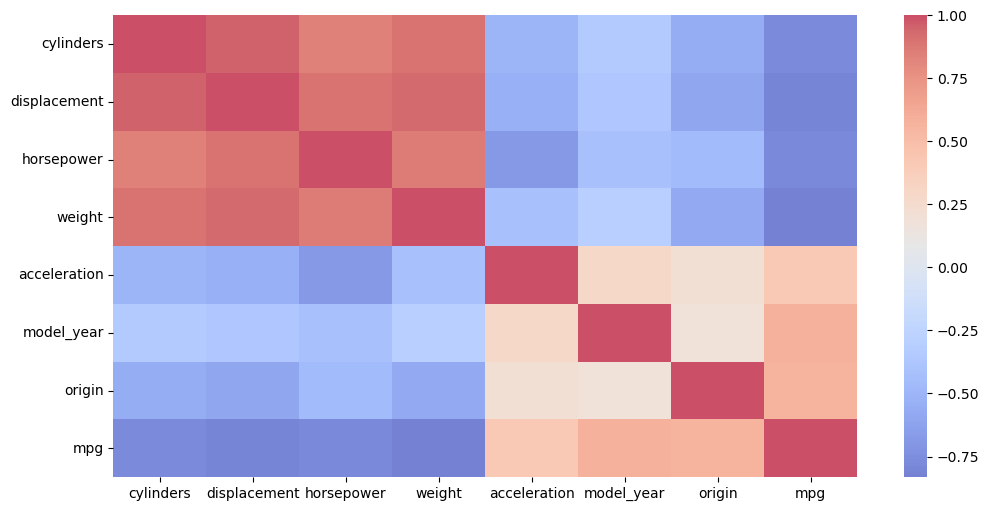

In [42]:
# Create a heatmap
plt.figure(figsize=(12,6))
corr = df_cars.corr()
sns.heatmap(corr, cmap='coolwarm', alpha=0.7)
plt.show()

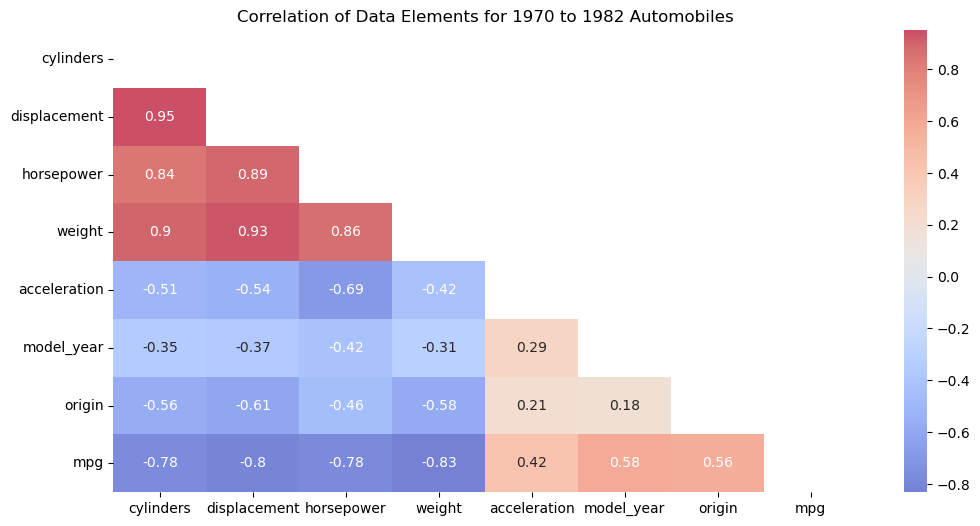

In [46]:
# Create a heatmap
plt.figure(figsize=(12,6))
corr = df_cars.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)  # fills with zeros
mask[np.triu_indices_from(mask)] = True 

sns.heatmap(corr, cmap='coolwarm', alpha=0.7, mask=mask, annot=True)
plt.title('Correlation of Data Elements for 1970 to 1982 Automobiles')
plt.show()

In [48]:
# What if we ONLY wanted to look at how the features correlate with `mpg`?
df_cars.corr()[['mpg']].sort_values(by='mpg', ascending=False)

,mpg
mpg,1.000000
model_year,0.579267
origin,0.563450
acceleration,0.420289
cylinders,-0.775396
horsepower,-0.781838
displacement,-0.804203
weight,-0.831741


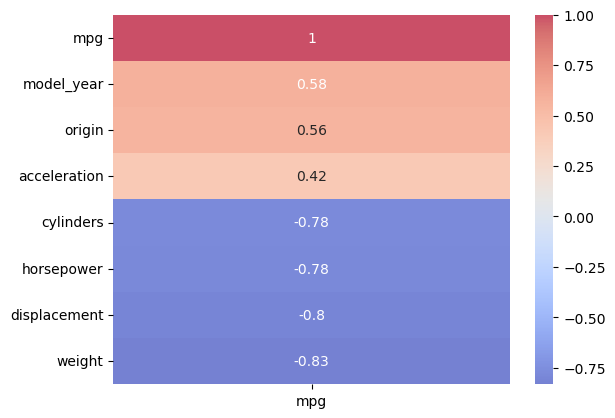

In [52]:
sns.heatmap(df_cars.corr()[['mpg']].sort_values(by='mpg', ascending=False), cmap='coolwarm', alpha=0.7, annot=True)
plt.show()

For more Seaborn color palettes, click [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Countplots

**Distribution of Model Year**

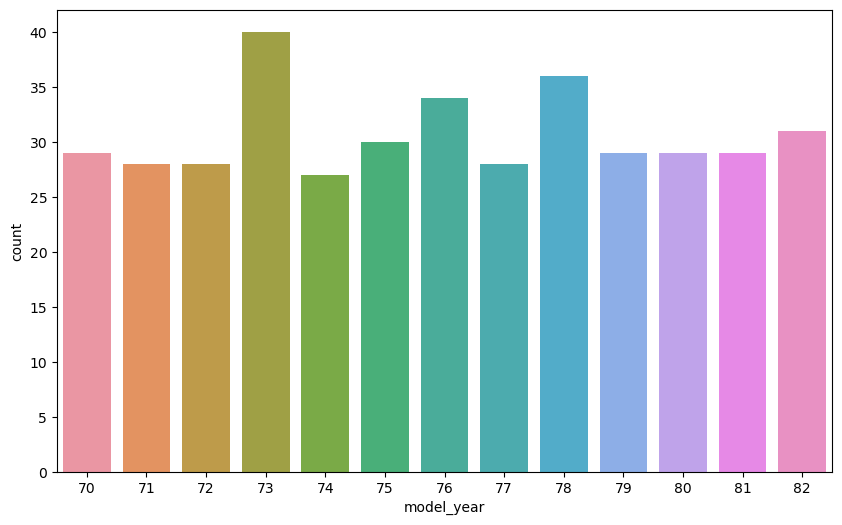

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_cars['model_year']);

**Distribution of Origin**

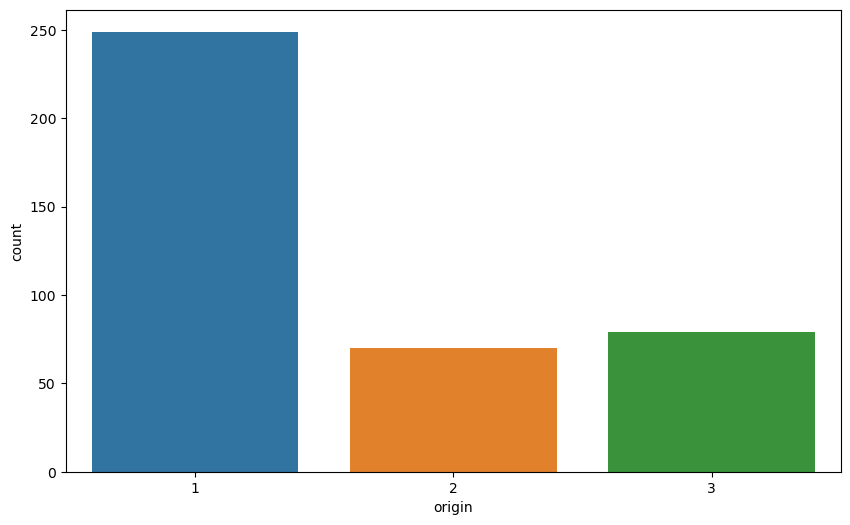

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_cars['origin']);

**Distribution of Cylinders**

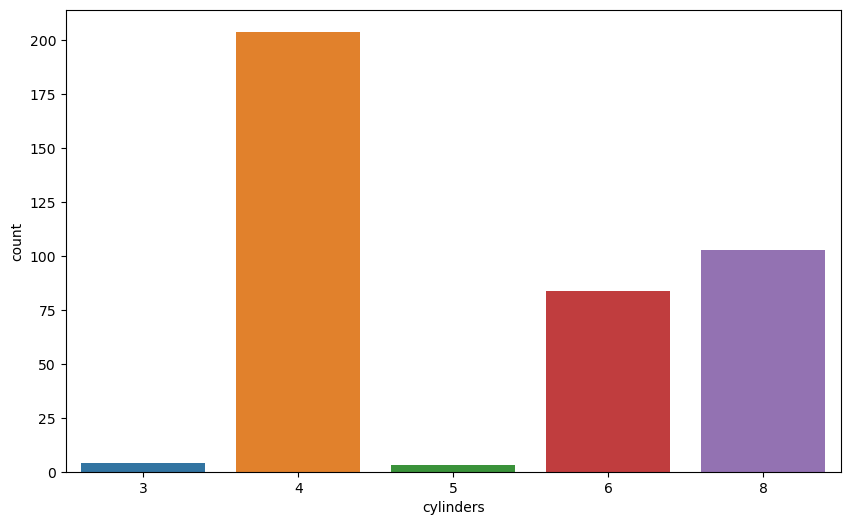

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_cars['cylinders']);

## Boxplots/Histograms

**MPG Distribution**

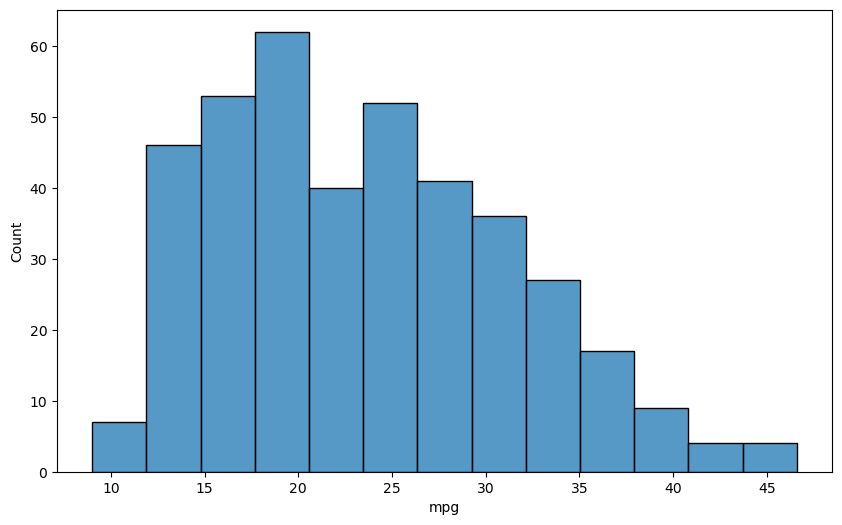

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_cars['mpg']);

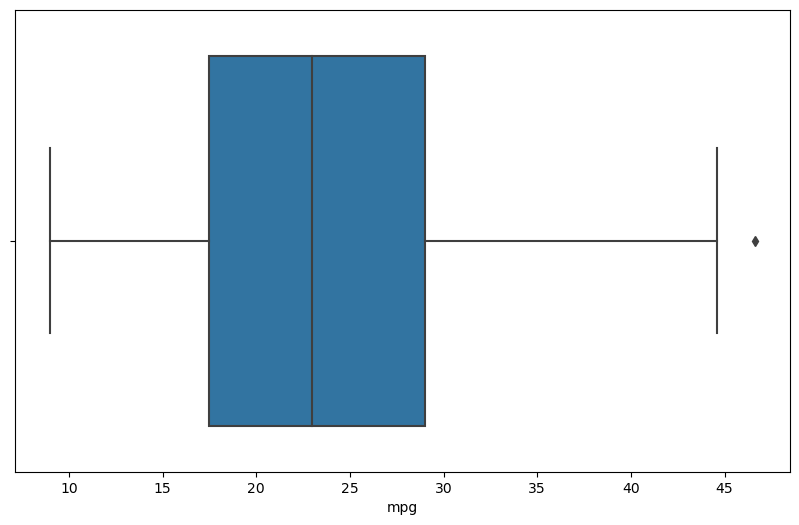

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_cars['mpg']);

**Weight Distribution**

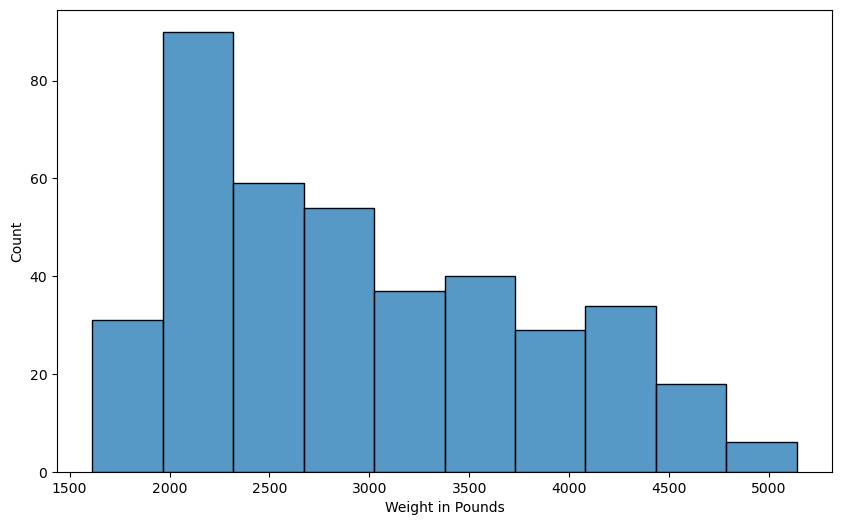

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(x=df_cars['weight'])
plt.xlabel('Weight in Pounds')
plt.show()

In [80]:
fig = px.violin(df_cars, y='weight')
fig.update_layout(yaxis_title='Weight in Pounds')
fig.show()

## Scatterplots

###### **Weight vs. MPG**

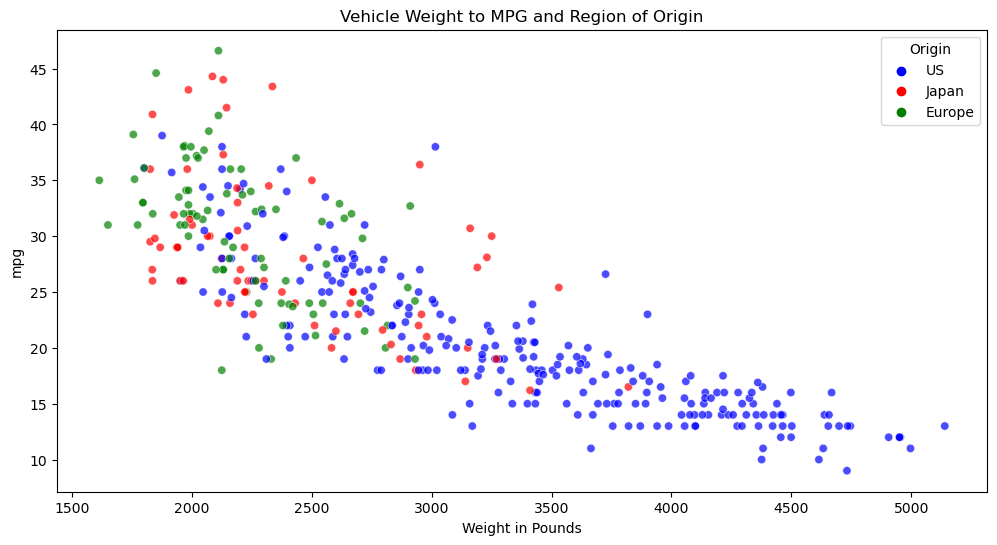

In [95]:
# Create a dictionary to map origin codes to labels
legend_labels = {1: 'US', 2: 'Europe', 3: 'Japan'}

plt.figure(figsize=(12,6))
sns.scatterplot(x=df_cars['weight'],
                y=df_cars['mpg'],
                hue=df_cars['origin'],
                palette=['blue', 'red', 'green'],
                alpha=0.7)
plt.xlabel('Weight in Pounds')
plt.title('Vehicle Weight to MPG and Region of Origin')

# Customize the legend labels
handles, labels = plt.gca().get_legend().legendHandles, [legend_labels[label] for label in df_cars['origin'].unique()]
plt.legend(handles=handles, labels=labels, title='Origin')

plt.show()

## Your turn!

In [24]:
# Create more plot(s) of your choosing to help you explore the data!